# Рекомендация тарифов

Оператор мобильной связи «Мегалайн» выяснил: многие клиенты пользуются архивными тарифами. Они хотят построить систему, способную проанализировать поведение клиентов и предложить пользователям новый тариф: «Смарт» или «Ультра».  

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.  

Постройте модель с максимально большим значением accuracy. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте accuracy на тестовой выборке самостоятельно.

### Описание данных:  

Каждый объект в наборе данных — это информация о поведении одного пользователя за месяц. Известно:
* сalls — количество звонков,
* minutes — суммарная длительность звонков в минутах,
* messages — количество sms-сообщений,
* mb_used — израсходованный интернет-трафик в Мб,
* is_ultra — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0).

### План проекта:

* Изучим данные. Сформулируем задачу.
* Разделим выборку на обучающую, валидационную и тестовую.
* Выберем несколько моделей и исследуем качество их предсказания в режиме default-настройки гиперпараметров.
* Выберем модель, которая показала наилучший результат. Попробуем улучшить его путем настройки гиперпараметров.
* Проверим модель на тестовой выборке.
* Проверим модель на адекватность

## Откройте и изучите файл

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [4]:
df = pd.read_csv('users_behavior.csv')
display(df.head())
df.info()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


Приведем столбцы calls и messages к типу int

In [5]:
df[['calls', 'messages']] = df[['calls', 'messages']].astype(int)

In [6]:
df.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


## Разбейте данные на выборки

Разделим выборки на обучающую, валидационную и тестовую в соотнощении 60%, 20%, 20% соответственно.

In [7]:
train_val, test = train_test_split(df, test_size=0.2, random_state=123)
train, valid = train_test_split(train_val, test_size=0.25, random_state=123)
print(test.shape)
print(train.shape)
print(valid.shape)

(643, 5)
(1928, 5)
(643, 5)


Сохраним матрицы признаков и ответов в таблицы

In [8]:
features_train = train.drop(columns=['is_ultra'])
target_train = train['is_ultra']
features_test = test.drop(columns=['is_ultra'])
target_test = test['is_ultra']
features_valid = valid.drop(columns=['is_ultra'])
target_valid = valid['is_ultra']

## Исследуйте модели

На данном этапе мы исследуем 3 модели классификации:  
* DecisionTreeClassifier
* RandomForestClassifier
* LogosticRegression

Сначала проверим работу моделей с параметрами по умолчанию 

DecisionTreeClassifier

In [9]:
model_tree_default = DecisionTreeClassifier(random_state=123)
model_tree_default.fit(features_train, target_train)
result_tree_default = model_tree_default.score(features_valid, target_valid)
result_tree_default_train = model_tree_default.score(features_train, target_train)
print(result_tree_default)
print(result_tree_default_train)

0.7247278382581649
1.0


RandomForestClassifier

In [10]:
model_forest_default = RandomForestClassifier(random_state=123)
model_forest_default.fit(features_train, target_train)
result_forest_default = model_forest_default.score(features_valid, target_valid)
result_forest_default_train = model_forest_default.score(features_train, target_train)
print(result_forest_default)
print(result_forest_default_train)

0.8009331259720062
1.0


LogisticRegression

In [11]:
model_lr_default = LogisticRegression(random_state=123, max_iter=1000, solver='lbfgs')
model_lr_default.fit(features_train, target_train)
result_lr_default = model_lr_default.score(features_valid, target_valid)
result_lr_default_train = model_lr_default.score(features_train, target_train)
print(result_lr_default)
print(result_lr_default_train)

0.7340590979782271
0.7546680497925311


DecisionTreeClassifier - получила точность предказания 72% на валидационной выборке.  

RandomForestClassifier - показала лучший результат среди трех на валидационной выборке - 80% 

LogisticRegression - недообучилась, в результате чего показала одинаково низкий результат как на обучающей 73%, так и на валидационной выборках 75%.  


Теперь попробуем поработать с гиперпараметрами, чтобы добиться улучшения качества моделей

DecisionTreeClassifier

In [12]:
best_depth = 1
best_model_tree = None
best_result_tree = 0
for depth in range(1,25):
    model_tree = DecisionTreeClassifier(random_state=123, max_depth=depth)
    model_tree.fit(features_train, target_train)
    result_tree = model_tree.score(features_valid, target_valid)
    if result_tree > best_result_tree:
        best_model_tree = model_tree
        best_result_tree = result_tree
        best_depth = depth
print(best_result_tree)
print('depth:', best_depth)

0.7947122861586314
depth: 9


RandomForestClassifier

In [13]:
best_model_forest = None
best_result_forest = 0
best_est_forest = 0
best_depth_forest = 0
for est in range(1, 50):
    for depth in range(1, 15):
        model_forest = RandomForestClassifier(random_state=123, n_estimators=est, max_depth=depth)
        model_forest.fit(features_train, target_train)
        result_forest = model_forest_default.score(features_valid, target_valid)
        if best_result_forest < result_forest:
            best_model_forest = model_forest
            best_result_forest = result_forest
            best_est_forest = est
            best_depth_forest = depth
            
print('depht:', best_depth_forest)
print('est:', best_est_forest)
print(best_result_forest)

depht: 1
est: 1
0.8009331259720062


LinearRegression проверять нет смысла, так как она недообучается

DecisionTreeClassifier:
  
После манипуляций с гиперпараметрами, модель стала значительно лучше, accuracy модели изменилось c 0.724 до 0.794.

RandomForestClassifier:  

После манипуляций с гиперпараметрами, модель стала хуже, accuracy модели изменилось c 0.8009 до 0.7993.

## Проверьте модель на тестовой выборке

DecisionTreeClassifier

In [14]:
print('Accuracy модели на тестовой выборке:', best_model_tree.score(features_test, target_test))

Accuracy модели на тестовой выборке: 0.7869362363919129


RandomForestClassifier

In [15]:
print('Accuracy модели на тестовой выборке:', best_model_forest.score(features_test, target_test))
print('Accuracy модели на тестовой выборке:', model_forest_default.score(features_test, target_test))

Accuracy модели на тестовой выборке: 0.7433903576982893
Accuracy модели на тестовой выборке: 0.8009331259720062


Результат проверки на тестовой выборке незначительно хуже, чем на валидационной. Модель RandomForestClassifier с гиперпараметрами по умолчанию показала себя значительно лучше и на тестовой выборке

## (бонус) Проверьте модели на адекватность

Посмотрим на соотношение категорий в нашей целевой переменной.

<Axes: ylabel='is_ultra'>

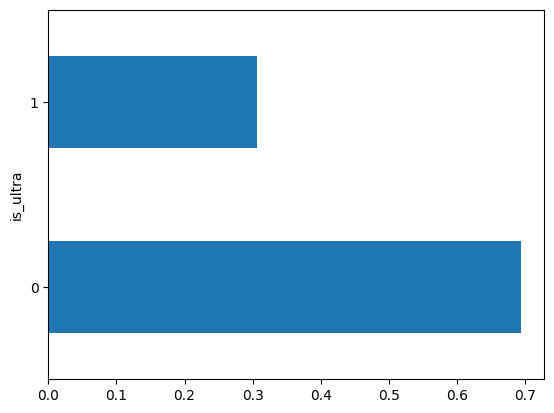

In [16]:
df['is_ultra'].value_counts(normalize=True).plot.barh()

Категории "0" представлена в большем количестве. Значит, если мы возьмем модель, которая каждый раз будет предсказывать, что клиент пользуется тарифом Smart, то мы будем правы чаще, чем если будем каждый раз предсказывать тариф Ultra.

In [17]:
print(f"""Модель, которая каждый раз предсказывает, что клиент пользуется тарифом Smart, будет права в {round((1-df['is_ultra'].mean())*100, 1)}% случаев""")


Модель, которая каждый раз предсказывает, что клиент пользуется тарифом Smart, будет права в 69.4% случаев


Accuracy нашей модели на тестовой выборке составляет 79,3%, и является выше данного показателя.

### Вывод: 
Мы рассмотрели три разных модели для решения задачи:  

* Модель решающего дерева, значение accuracy - 0.794
* Модель случайного леса, значение accuracy - 0.799
* Модель случайного леса c гиперпараметрами по умолчанию , значение accuracy - 0.8009
* Модель логистической регрессии, значение accuracy - 0.734, но она так же и недообучилась, на тренировочной выборке показала значение 0.755

Таким образом, наиболее точной моделью является модель случайного леса c гиперпараметрами по умолчанию оказалась лучшей.

Сохраним модель в файл для дальнейших манипуляций

In [18]:
import pickle
pickle.dump(model_forest_default, open('tariff_recommendation.pkl', 'wb'))